In [1]:
import pandas as pd

pth = "router-output.log.csv"
df = pd.read_csv(pth, header=None)
df = df.reset_index()
df.columns = ["step", "layer", "e0", "e1", "e2", "e3", "e4", "e5", "e6", "e7"]
df

step  layer   e0   e1   e2   e3   e4   e5   e6   e7
0            0      0  121  128  126  101  131  110  190  117
1            1      1  102  196  142  127  192   74  164   27
2            2      2  242  149   11   15  190  215  124   78
3            3      3  134   48   10  145  165  240   53  229
4            4      4   22   37  369    3  196  120   14  263
...        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...
307552  307552      3  105   42   42  149  149  190  124  223
307553  307553      4   36   57  342    0   72  270    1  246
307554  307554      5    7    0  200  113    1   23  177  503
307555  307555      6    0  482  434   69   14    7    3   15
307556  307556      7    3  512   15  161  188  129    1   15

[307557 rows x 10 columns]

### Average token counts for each expert per layer

In [2]:
tokens_by_expert_by_layer = df.groupby('layer').mean().reset_index().drop(["step", "layer"], axis=1)
tokens_by_expert_by_layer

e0          e1          e2          e3          e4          e5  \
0  156.633424  142.795032  113.844037  123.804682  147.189934  113.391364   
1   94.317519  175.356639  177.955001  152.263962  174.626583   73.389309   
2  179.010274  144.477253   55.837014   25.756795  144.920042  189.987515   
3   98.467031   49.257849   43.154793  195.374015  138.539134  184.365119   
4   47.293016   56.561139  295.924776   10.543790  102.232982  243.825543   
5    7.666424    4.740870  189.410753  139.315498   19.025648   22.297003   
6    3.141010  482.742196  395.554235   83.697508   12.304521   19.028691   
7   13.630866  504.017324   15.960800  300.170976  100.900791   68.327047   

           e6          e7  
0  118.411419  107.930108  
1  126.856496   49.234491  
2  133.595474  150.415633  
3  117.224477  197.617584  
4    8.242190  259.376564  
5  145.389788  496.154016  
6    9.870175   17.661664  
7    5.828842   15.163354

Duplicate key in file PosixPath('/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 799 ('font.family : sans-serif ')
Duplicate key in file PosixPath('/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 800 ('font.sans-serif : SimHei ')
Duplicate key in file PosixPath('/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 801 ('axes.unicode_minus : False ')


Text(0.5, 0, 'Layer')

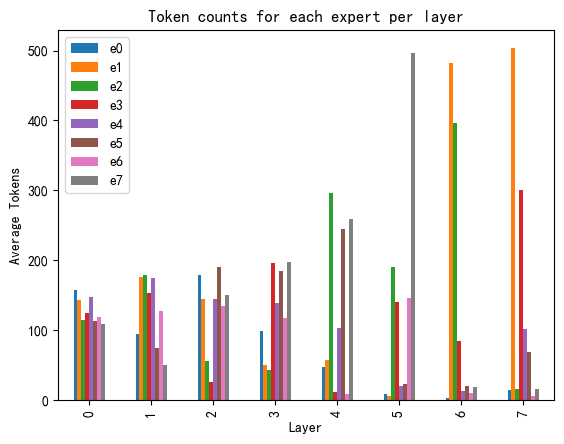

In [3]:
from matplotlib import pyplot as plt

tokens_by_expert_by_layer.plot(kind='bar')
plt.title("Token counts for each expert per layer")
plt.ylabel("Average Tokens")
plt.xlabel("Layer")

### Average token by step

In [4]:
dfs = []
for l in df.layer.unique():
    msk = df["layer"] == l
    df_ = df[msk]
    df_ = df_.reset_index(drop=True).reset_index(drop=False)
    df_["iter"] = df_["index"]
    df_.drop(["index", "step"], axis=1)
    dfs.append(df_)
df2 = pd.concat(dfs)
df2

index    step  layer   e0   e1   e2   e3   e4   e5   e6   e7   iter
0          0       0      0  121  128  126  101  131  110  190  117      0
1          1       8      0  115  140  126  111  121  109  174  128      1
2          2      16      0  143  117  110   99  134  123  170  128      2
3          3      24      0  107  164  123  106  140   89  179  116      3
4          4      32      0  123  129  120   99  129   96  192  136      4
...      ...     ...    ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
38439  38439  307524      7    7  512   15  143  175  142    1   29  38439
38440  38440  307532      7    9  510   14  164  177  107    1   42  38440
38441  38441  307540      7    7  511   19  154  178  129    0   26  38441
38442  38442  307548      7    4  512   16  126  208  139    0   19  38442
38443  38443  307556      7    3  512   15  161  188  129    1   15  38443

[307557 rows x 12 columns]

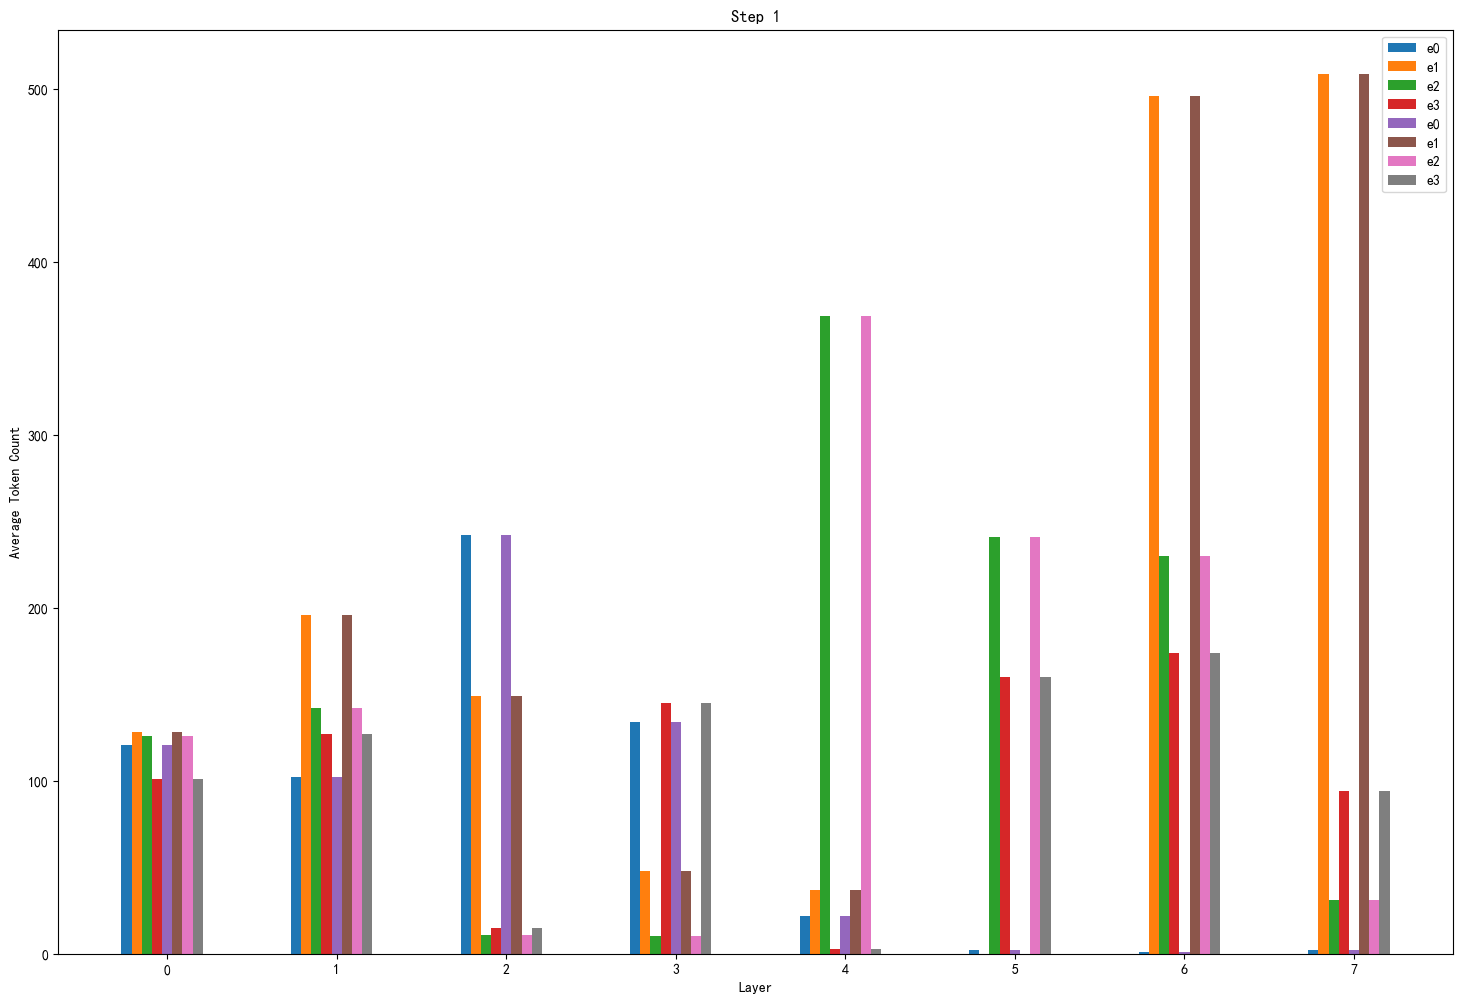

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML


fig, ax = plt.subplots(figsize=(18, 12))

STEPS = len(df2["iter"].unique())
STEPS = 2000
bar_width = 0.06  # Width of each bar

def update_hist(step):
    df_ = df2[df2["iter"] == step]
    
    ax.clear()
    x = np.arange(len(df_['layer']))  # The label locations
    
    for i in range(4):
        ax.bar(x - bar_width * (4-i), df_[f'e{i}'], width=bar_width, label=f'e{i}')
    
    for i in range(4):
        ax.bar(x + bar_width * i, df_[f'e{i}'], width=bar_width, label=f'e{i}')

    ax.set_xlabel("Layer")
    ax.set_ylabel("Average Token Count")
    ax.set_title(f"Step {step + 1}")
    ax.set_xticks(x)
    ax.set_xticklabels(df_['layer'])
    ax.legend()

ani = FuncAnimation(fig, update_hist, frames=np.arange(0, STEPS, 10), repeat=False)

HTML(ani.to_jshtml())
